In [166]:
import numpy as np
import matplotlib.pyplot as plt

# Bandit Algorithm

- Initialisation des récompenses des bandits

In [15]:
def init_bras(nb_bras, recompense_distribution='uniform'):
    bras_list = []
    for _ in range(nb_bras):
        #Distribution uniforme
        if recompense_distribution == 'uniform':
             bras_list.append(np.random.uniform(0, 10))
        #Distrubion gaussienne moyenne 5 et écart type 2
        elif recompense_distribution == 'gaussian':
            bras_list.append(np.random.normal(5, 2))
    return bras_list

init_bras(10)

[7.287062988002991,
 5.353419190540617,
 7.104721163698354,
 3.4364901980839613,
 3.5448886458929927,
 4.673285020136228,
 6.819232159805837,
 9.515468046207282,
 8.198627160787094,
 9.059758298293005]

- Incremental Uniform. This algorithm repeatedly loops through the arms pulling each arm once
each time through the loop. The average rewards for each arm are tracked and for the simple regret
objective, the arm with the best average reward is returned as the best arm.

In [16]:
def incremental_uniform(bras_list, nb_tirage):

    recompense_tot = [0] * len(bras_list)

    for _ in range(nb_tirage):
        for i in range(len(bras_list)):
            recompense = np.random.normal(bras_list[i], 1)
            recompense_tot[i] += recompense

    meilleur_bras = np.argmax(recompense_tot)
    
    return meilleur_bras

• UCB. The UCB algorithm. At the end of the exploration, the algorithm returns the arm that has
accumulated the largest average reward.

In [17]:
def ucb(bras_list, nb_tirage):
    nb_bras = len(bras_list)
    recompenses_tot = np.zeros(nb_bras)
    nb_tirages_par_bras = np.zeros(nb_bras)
    
    for t in range(nb_tirage):
        bras_a_tirer = np.argmax(recompenses_tot / (nb_tirages_par_bras + 1e-5) + np.sqrt(2 * np.log(t + 1) / (nb_tirages_par_bras + 1e-5)))
        
        recompense = np.random.normal(bras_list[bras_a_tirer], 1)
        recompenses_tot[bras_a_tirer] += recompense
        nb_tirages_par_bras[bras_a_tirer] += 1

        meilleur_bras = np.argmax(recompenses_tot)
    
    return meilleur_bras


• Simple ϵ-Greedy. ϵ is a parameter of the algorithm such that the arm that appears to be the best is selected with a probability of ϵ otherwise a random arm is selected from among the other arms. At the end, it returns the best arm.

In [18]:
def simple_epsilon_greedy(bras_list, epsilon, nb_tirage):
    nb_bras = len(bras_list)
    recompenses_tot = np.zeros(nb_bras)
    nb_tirages_par_brassard = np.zeros(nb_bras)

    for t in range(nb_tirage):
        if np.random.rand() < epsilon:
            bras_a_tirer = np.argmax(recompenses_tot / (nb_tirages_par_brassard + 1e-5))
        else:
            bras_a_tirer = np.random.choice(nb_bras)
        
        recompense = np.random.normal(bras_list[bras_a_tirer], 1)
        recompenses_tot[bras_a_tirer] += recompense
        nb_tirages_par_brassard[bras_a_tirer] += 1

    meilleur_bras = np.argmax(recompenses_tot)

    return meilleur_bras

 - EXP3: an ϵ-greedy approach with exponential weighting.

In [322]:
def exp3(bras_list, epsilon, nb_tirage):

    nb_bras = len(bras_list)
    poids = np.ones(nb_bras)
    gain_total = 0
    meilleur_bras = None

    for t in range(nb_tirage):

        poids /= np.sum(poids)     
        bras = np.random.choice(nb_bras, p=poids)       
        gain_total += bras_list[bras]      
        estimation = bras_list[bras] / poids[bras]
        
        for i in range(nb_bras):
            poids[i] *= np.exp(epsilon * estimation / nb_bras)
        
        if meilleur_bras is None or bras_list[bras] > bras_list[meilleur_bras]:
            meilleur_bras = bras

    return meilleur_bras

# TEST

In [323]:
def run_and_plot_bandit_experiment(m, n, bras, mode='cumulative_regret'):

    regrets_incremental_uniform = np.zeros(n)
    regrets_ucb = np.zeros(n)
    regrets_simple_epsilon_greedy = np.zeros(n)
    regrets_epsilon_greedy = np.zeros(n)
    regrets_exp3_01 = np.zeros(n)  # Pour EXP3 avec epsilon=0.1
    regrets_exp3_02 = np.zeros(n)  # Pour EXP3 avec epsilon=0.2

    for _ in range(m):

        
        meilleur_bras = np.argmax(bras)

        for t in range(1, n+1):
            
            # Incremental Uniform
            best_arm = incremental_uniform(bras, t)
            
            if mode == 'cumulative_regret':
                regrets_incremental_uniform[t-1] += np.sum(bras[meilleur_bras] - bras[best_arm])
            elif mode == 'simple_regret':
                regrets_incremental_uniform[t-1] += bras[meilleur_bras] - bras[best_arm]
            
            # UCB
            best_arm = ucb(bras, t)
            
            if mode == 'cumulative_regret':
                regrets_ucb[t-1] += np.sum(bras[meilleur_bras] - bras[best_arm])
            elif mode == 'simple_regret':
                regrets_ucb[t-1] += bras[meilleur_bras] - bras[best_arm]

            # Simple Epsilon Greedy
            best_arm = simple_epsilon_greedy(bras, 0.1, t)
            
            if mode == 'cumulative_regret':
                regrets_simple_epsilon_greedy[t-1] += np.sum(bras[meilleur_bras] - bras[best_arm])
            elif mode == 'simple_regret':
                regrets_simple_epsilon_greedy[t-1] += bras[meilleur_bras] - bras[best_arm]
            
            # Epsilon Greedy avec epsilon = 0.2
            best_arm = simple_epsilon_greedy(bras, 0.2, t)
            
            if mode == 'cumulative_regret':
                regrets_epsilon_greedy[t-1] += np.sum(bras[meilleur_bras] - bras[best_arm])
            elif mode == 'simple_regret':
                regrets_epsilon_greedy[t-1] += bras[meilleur_bras] - bras[best_arm]

            # EXP3 avec epsilon = 0.1
            best_arm = exp3(bras, 0.1, t)
            
            if mode == 'cumulative_regret':
                regrets_exp3_01[t-1] += np.sum(bras[meilleur_bras] - bras[best_arm])
            elif mode == 'simple_regret':
                regrets_exp3_01[t-1] += bras[meilleur_bras] - bras[best_arm]

            # EXP3 avec epsilon = 0.2 (ajout de cette section)
            best_arm = exp3(bras, 0.2, t)
            
            if mode == 'cumulative_regret':
                regrets_exp3_02[t-1] += np.sum(bras[meilleur_bras] - bras[best_arm])
            elif mode == 'simple_regret':
                regrets_exp3_02[t-1] += bras[meilleur_bras] - bras[best_arm]

    regrets_incremental_uniform /= m
    regrets_ucb /= m
    regrets_simple_epsilon_greedy /= m
    regrets_epsilon_greedy /= m
    regrets_exp3_01 /= m
    regrets_exp3_02 /= m

    plt.figure(figsize=(12, 8))
    plt.plot(regrets_incremental_uniform, label="Incremental Uniform")
    plt.plot(regrets_ucb, label="UCB")
    plt.plot(regrets_simple_epsilon_greedy, label="Simple Epsilon Greedy (epsilon=0.1)")
    plt.plot(regrets_epsilon_greedy, label="Epsilon Greedy (epsilon=0.2)")
    plt.plot(regrets_exp3_01, label="EXP3 (epsilon=0.1)")
    plt.plot(regrets_exp3_02, label="EXP3 (epsilon=0.2)")  # Ajout de cette ligne
    plt.xlabel("Nombre de tirages")
    
    if mode == 'cumulative_regret':
        plt.ylabel("Regret cumulé moyen")
    elif mode == 'simple_regret':
        plt.ylabel("Regret moyen simple")
    
    plt.title("Comparaison des algorithmes de bandit à "+ str(len(bras)) +" bras")
    plt.legend()
    plt.show()


# Distribution uniforme

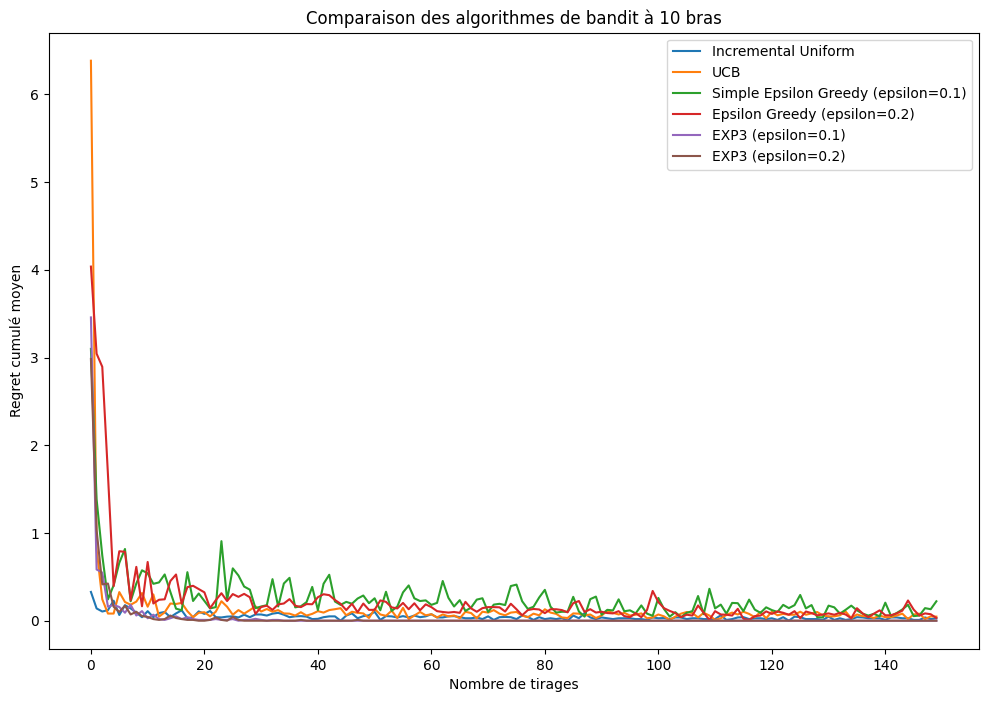

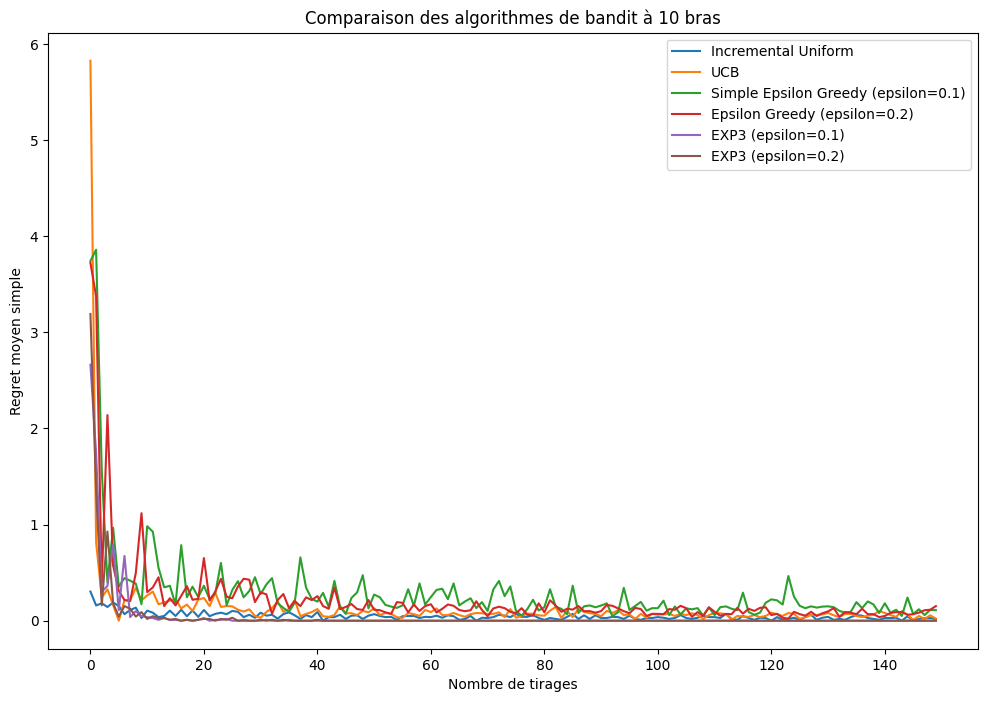

In [327]:
bras = init_bras(nb_bras=10, recompense_distribution='uniform')

run_and_plot_bandit_experiment(m=10, n=150, bras=bras, mode='cumulative_regret')
run_and_plot_bandit_experiment(m=10, n=150, bras=bras, mode='simple_regret')

# Distribution gaussienne moyenne 5 et écart type 2

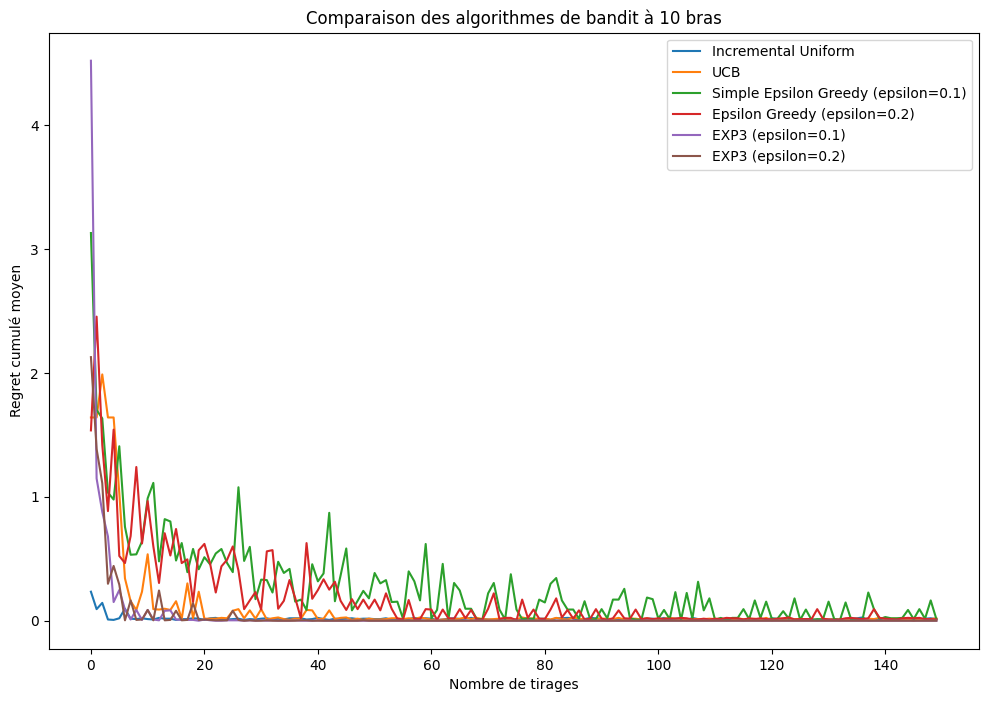

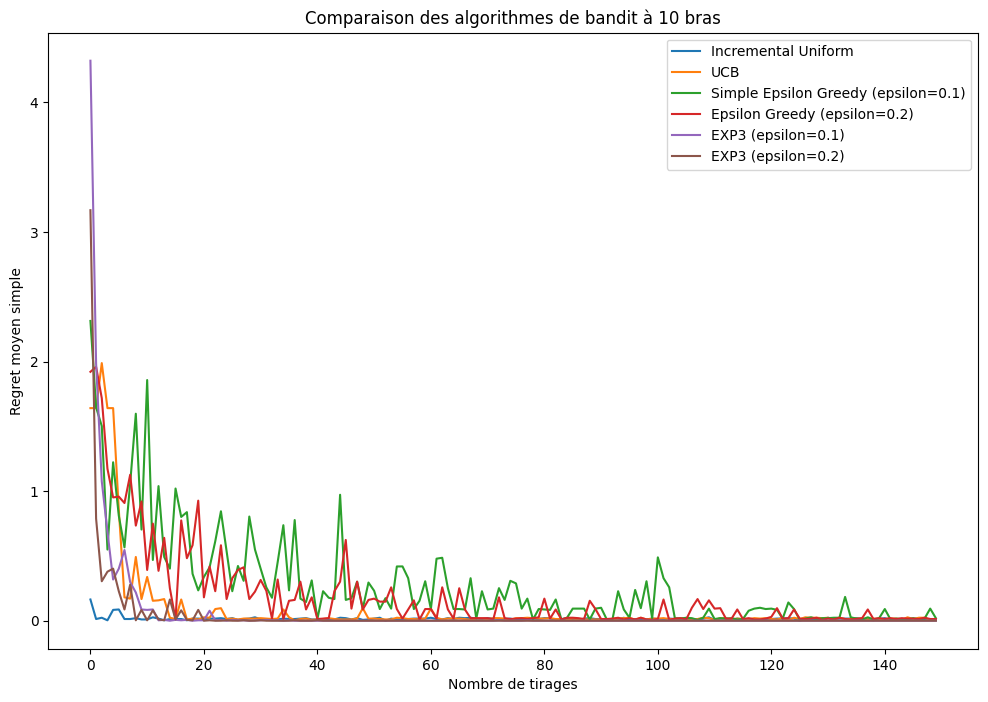

In [328]:
bras = init_bras(nb_bras=10, recompense_distribution='gaussian')

run_and_plot_bandit_experiment(m=10, n=150, bras=bras, mode='cumulative_regret')
run_and_plot_bandit_experiment(m=10, n=150, bras=bras, mode='simple_regret')

# Moins de bras : 3 bras (distribution uniforme)

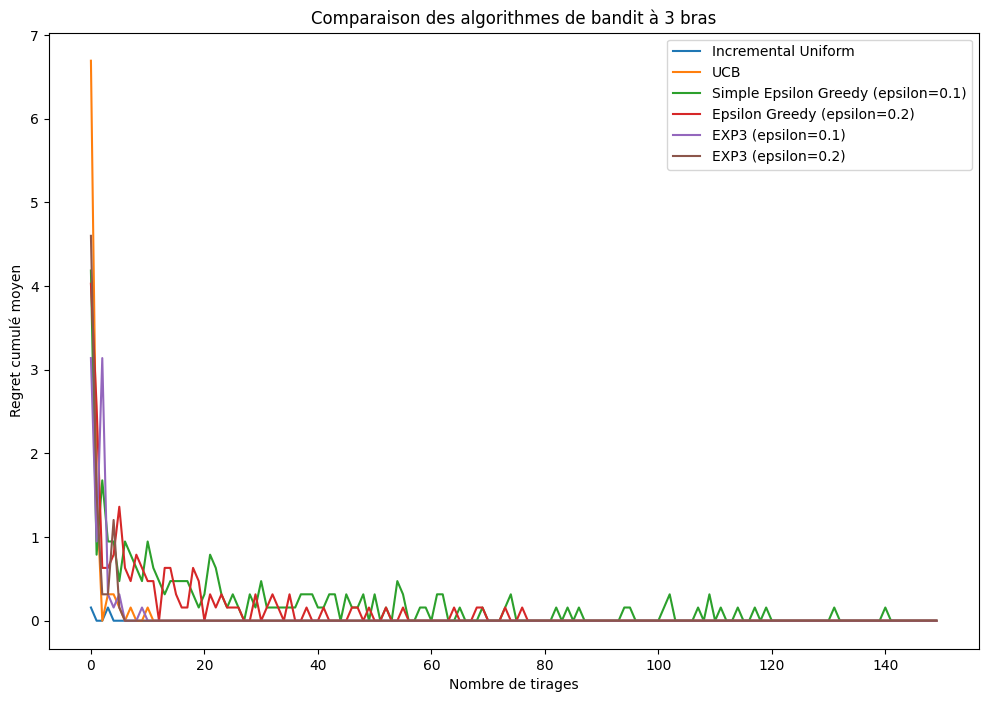

In [329]:
bras = init_bras(nb_bras=3, recompense_distribution='uniform')

run_and_plot_bandit_experiment(m=10, n=150, bras=bras, mode='cumulative_regret')

# Plus de bras : 50 bras (distribution uniforme)

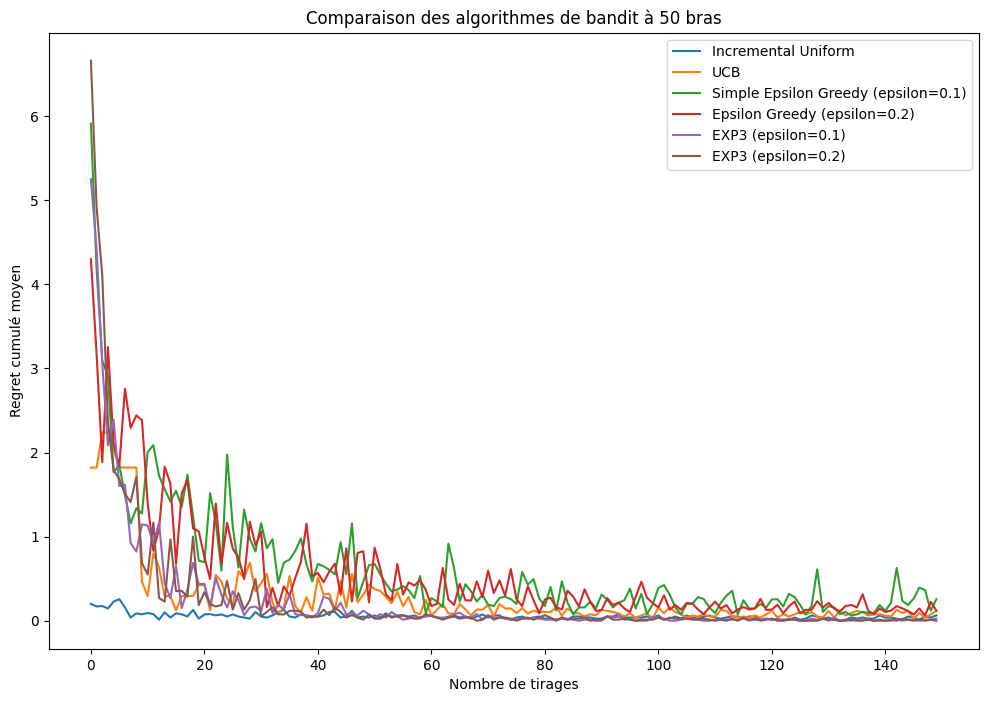

In [330]:
bras = init_bras(nb_bras=50, recompense_distribution='uniform')

run_and_plot_bandit_experiment(m=10, n=150, bras=bras, mode='cumulative_regret')